<h1>Credit Risk Prediciton</h1>

# Tables of Content:

**1. [Understanding the problem](#problem)** <br>
- The problem
- Information about datasets

**2. [Understand the original data with DDA](#DDA)** <br>

**3. [Data Attributes' analysis with EDA](#EDA)** <br>
- 3.1 Univariate Analysis
- 3.2 Bivariate Analysis

**4. [Data Preprocessing](#preprocessing)** <br>
- 4.1 Prepare for target variable - Risk
- 4.2 Prepare for predictor variable
- 4.3 Deal with missing values
- 4.4 Deal with skewed varaibles
- 4.5 Transform category variables into numerical

**5. [Prediction Model Construction and Evaluation](#Modelling)** <br>

**6. [Prediction models' fine tune](#tune)** <br>
- 6.1 Features selection
- 6.2 Access model's Overfitting with CV
- 6.3 Models' Hyperparameter setting 


# **1. Understand the problem** <a id="Problem"></a> <br>

<h2>What is the Purpose of Credit Risk Analysis?</h2>
Credit risk analysis is a form of analysis performed by a credit analyst on potential borrowers to determine their ability to meet debt obligations. The main goal of credit analysis is to determine the **creditworthiness** of potential borrowers and their ability to honor their debt obligations.

If the borrower presents an acceptable level of default risk, the analyst can recommend the approval of the credit application at the agreed terms. The outcome of the credit risk analysis determines the risk rating that the borrower will be assigned and their ability to access credit.

When calculating the credit risk of a particular borrower, lenders consider various factors commonly referred to as the “5 Cs of Credit.” The factors include the borrower’s capacity to repay credit, character, capital, conditions, and collateral. The lender uses the factors to evaluate the characteristics of the borrower and conditions of the loan to estimate the probability of default and the subsequent risk of financial loss.

Credit analysts may use various financial analysis techniques, such as ratio analysis and trend analysis to obtain measurable numbers that quantify the credit loss. The techniques measure the risk of credit loss due to changes in the creditworthiness of borrowers.

When measuring the credit loss, we consider both losses from counterparty default, as well as deteriorating credit risk rating.

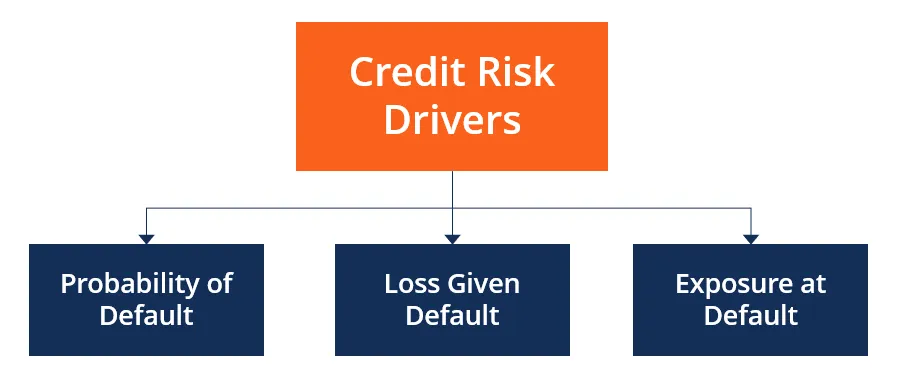

<h2>The data set</h2>
This is a simple version of the original dataset [] The purpsoe is to illustrate the process and the techniques needed for the prediction of the possible default. 

<b>Age </b>(numeric)<br>
<b>Sex </b>(text: male, female)<br>
<b>Job </b>(numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)<br>
<b>Housing</b> (text: own, rent, or free)<br>
<b>Saving accounts</b> (text - little, moderate, quite rich, rich)<br>
<b>Checking account </b>(text - little, moderate, quite rich, rich)<br>
<b>Credit amount</b> (numeric, in DM)<br>
<b>Duration</b> (numeric, in month)<br>
<b>Purpose</b>(text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others<br>
<b>Risk </b> (Value target - No or Yes)<br>


# **2. Understanding data with DDA** <a id="DDA"></a> 

In [69]:
#Load the librarys
import pandas as pd #To work with dataset
import numpy as np #Math library
import seaborn as sns #Graph library that use matplot in background
import matplotlib.pyplot as plt #to plot some parameters in seaborn

import warnings
warnings.filterwarnings('ignore')
cmap=sns.color_palette('Blues_r')

In [11]:
#Importing the data
df = pd.read_csv("german_credit_data.csv",index_col=0)

In [101]:
# check dataframe df_credit
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [13]:
# check data size and Missings values,type of data 
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 85.9+ KB
None


In [14]:
#Looking unique values
print(df.nunique())

Age                  53
Sex                   2
Job                   4
Housing               3
Saving accounts       4
Checking account      3
Credit amount       921
Duration             33
Purpose               8
Risk                  2
dtype: int64


In [15]:
print(df.describe())

               Age          Job  Credit amount     Duration
count  1000.000000  1000.000000    1000.000000  1000.000000
mean     35.546000     1.904000    3271.258000    20.903000
std      11.375469     0.653614    2822.736876    12.058814
min      19.000000     0.000000     250.000000     4.000000
25%      27.000000     2.000000    1365.500000    12.000000
50%      33.000000     2.000000    2319.500000    18.000000
75%      42.000000     2.000000    3972.250000    24.000000
max      75.000000     3.000000   18424.000000    72.000000


Findings: With this basic data fummary, we can see that 
- The data size is: 1000 (smaples) X 10 (properties).
- Among the 10 properties, Risk is the target variable (dependent variable) (we need to predict with a model)
- There are 4 avrables with int64 type, and 6 with object(string) type.
- We can see the range of each variables the most value is 921 from Credit amount, and the least is a binary form Sex, and Risk. 
- We can also see that **Saving accounts** and **Checking account** have missing values since their "non-null" is less than the number of samples. 
- Job should has a categorical typ

##  Find  missing values <a id="missing value"></a> 

                  Num   Pct
Age                 0   0.0
Sex                 0   0.0
Job                 0   0.0
Housing             0   0.0
Saving accounts   183  18.3
Checking account  394  39.4
Credit amount       0   0.0
Duration            0   0.0
Purpose             0   0.0
Risk                0   0.0


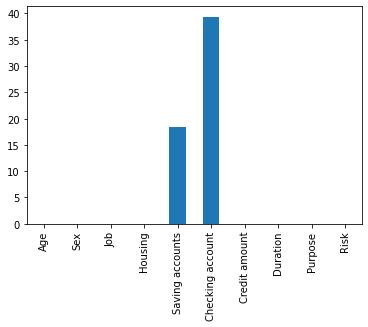

In [16]:
#Get the numbers of missing values in each column
missing = df.isnull().sum()

#Get the percentage of missing values in each column
missing_pct = round(df.isnull().sum()/len(df) * 100, 1)

data_missing = pd.concat([missing, missing_pct], axis=1)
data_missing.columns = ["Num", "Pct"]
print(data_missing)

#Plot missing values
data_missing['Pct'].plot(kind= "bar")
plt.show()

<b>The result shows there are 183 missing values in Saving accounts and 194 misisng values in Checking account <b>
<b> The percent age of msisng vlaues are 18.3 and 39.4 respectively. They are **Alrmingly high** and needs investgate and understand why.
    We will deal with the missing values later

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 85.9+ KB


# 3. Data Attributes Analysis with EDA<a id="EDA"></a> 


EDA is used to sever two purposes: 

1. Find each individual varaible's distribution (assess its quality), It is called "Univariate analysis"
2. find relations betwwen each individual variable and the dependent varaible. it is called "Bivariate analysis"


## 3.1 Univariate analysis<a id="Uni"></a> 

Looking into individual data attributes in terms its range and distrobutions

<h2> 3.1.1. Looking through <b>Object</b> variables and their distribuition</h2>

In [25]:
# Distribution graphs (histogram/bar graph) of object column 
def plotObjColumnDistribution(df, nGraphShown, nGraphPerRow):
    print(f'=== Distribution of features with object values ===')
    
    df = df[[col for col in df.select_dtypes(["object", "category"])]] # pick columns with object type
    
    nRow, nCol = df.shape
    columnNames = list(df)
    print(columnNames)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    
    plt.figure(num = None, figsize = (3 * nGraphPerRow, 3 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
 
    for i, col in enumerate(columnNames):
        # Plot distribution 
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        valueCounts = columnDf.value_counts()
        valueCounts.plot.bar()
        
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
        
    # Show the plot
    plt.tight_layout()
    plt.show()

=== Distribution of features with object values ===
['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose', 'Risk']


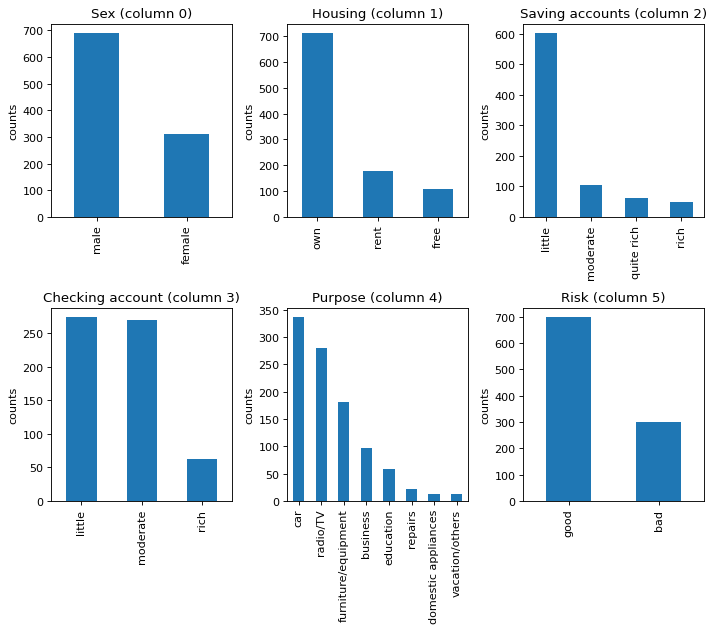

In [26]:
plotObjColumnDistribution(df, 10, 3)

**Findings**: 
1. Among the 6 catagorical attributes. The value are distributed **Unevenly** most are **Skewed** to the left. It may affact the prediction later.
2. The targeted dependent varaible **Risk** is **imblanced** the ratio is 700:300 between "good" and "bad" 

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 85.9+ KB


<h2> 3.1.2. Looking through numerial variables and their distribuition</h2>

In [31]:
# Distribution graphs (histogram/bar graph) of column data with (num)
def plotNumColumnDistribution(df,nGraphPerRow):
    print(f'=== Distribution of features with number values ===')
    
    df = df[[col for col in df.select_dtypes(np.number)]] # pick columns with bumber type
    
    nRow, nCol = df.shape
    columnNames = list(df)
    print(columnNames)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    
    plt.figure(num = None, figsize = (3 * nGraphPerRow, 3 * nGraphRow))
 
    for i, col in enumerate(columnNames):
        # Plot distribution 
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        sns.distplot(df[col], color='blue')
        plt.title(f'Distribution of {col}')
    # Show the plot
    plt.tight_layout()
    plt.show()

=== Distribution of features with number values ===
['Age', 'Job', 'Credit amount', 'Duration']


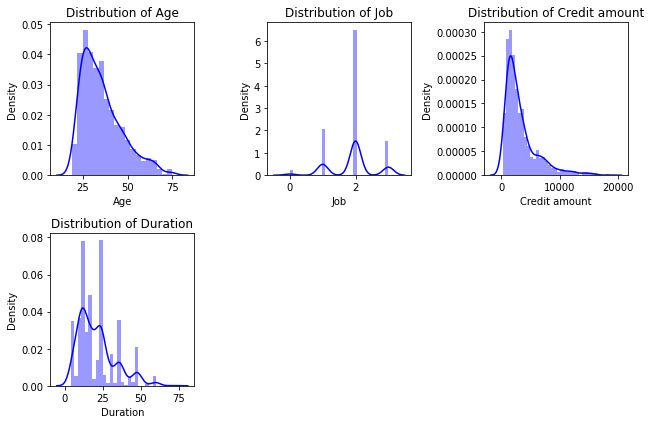

In [32]:
plotNumColumnDistribution(df, 3)

**Findings**: 

Among the 3 numerial attributes. The two values **Age** and **Credit amount** are distributed **Unevenly** and are **Skewed** to the left. It may affact the prediction later.


In [35]:
#!pip install plotly

In [36]:
import plotly.offline as py 
py.init_notebook_mode(connected=True) # this code, allow us to work with offline plotly version
import plotly.graph_objs as go # it's like "plt" of matplot
import plotly.tools as tls # It's useful to we get some tools of plotly
import warnings # This library will be used to ignore some warnings
from collections import Counter # To do counter of some features


# 3.2. Bivariate Analysis <a id="Bi"></a> 
Looking into two variables, particularrly the vavriable with the dependent varable **Risk**

## 3.2.1. Seabone Pairewise plot is very handy

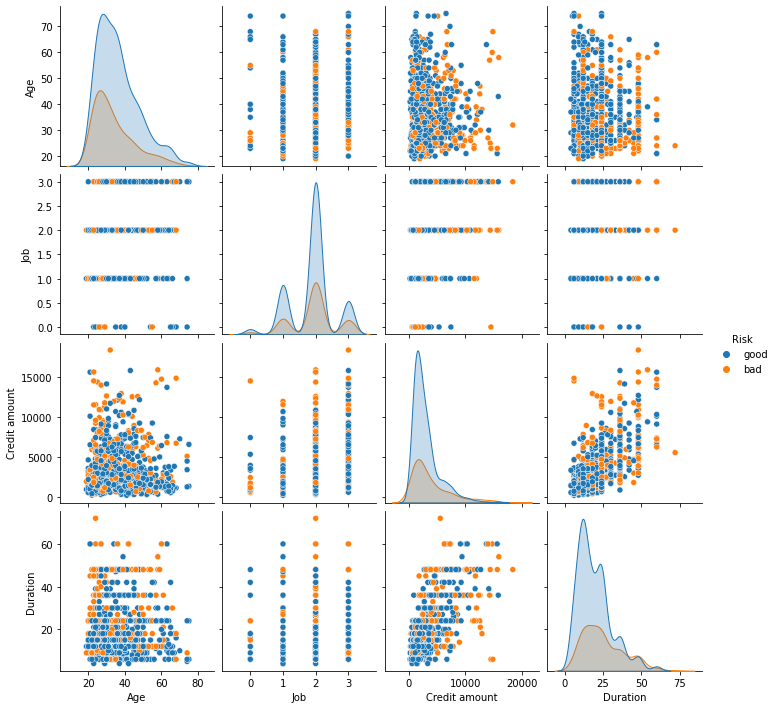

In [37]:
# Seaborn pairplot can produce a grid of Axes such that each numeric variable in data will by shared across the y-axes 
# across a single row and the x-axes across a single column.
sns.pairplot(df, hue="Risk")

## 3.2.2 Check numerical varibles with Risk

In [41]:
# Distribution graphs (histogram/bar graph) of Numerical columns related with dependent variable risk
def plotRiskNumColumnDistribution(df, nGraphPerRow):
    
    df2 = df[[col for col in df.select_dtypes(np.number)]] # pick columns with number type
    
    nRow, nCol = df2.shape
    columnNames = list(df2)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    fig, axes = plt.subplots(int(nGraphRow), nGraphPerRow, figsize=(12, 8))
    axes = axes.ravel()

    for ax in axes:
        ax.set_axis_off()
    
    for i in range(len(columnNames)):
        #print (df[df["Risk"]=="No"][columnNames[i]].head())
        axes[i].hist(df[df["Risk"]=="good"][columnNames[i]], alpha=0.5, color='blue',  label='No')
        axes[i].hist(df[df["Risk"]=="bad"][columnNames[i]], alpha=0.5, color='red',  label='Yes')    
        
        axes[i].legend(prop={'size': 10})
        axes[i].set_title(str(columnNames[i]))
        axes[i].set_axis_on()
 
    fig.tight_layout()
    plt.show()

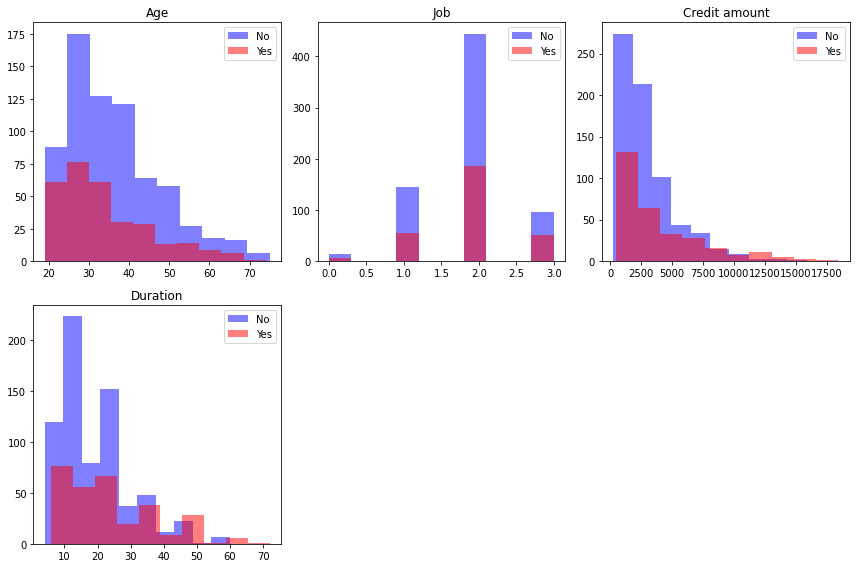

In [42]:
plotRiskNumColumnDistribution(df, 3)

**Findings**: 

Among the 3 numerial attributes. The two values **Age** and **Credit amount** are distributed **Unevenly** and are **Skewed** to the left. The Risk is propotionally with the distribution. It may affact the prediction later.


## 3.2.3 Check categorical variables against Risk

In [44]:
# Distribution graphs (histogram/bar graph) of object column 
def plotRiskObjColumnDistribution(df, nGraphPerRow):
    print(f'=== Distribution of features with object values ===')
    df2 = df[[col for col in df.select_dtypes(["object", "category"])]] # pick columns with object type
    nRow, nCol = df2.shape
    #print(df2)

    columnNames = list(df2)
    #print(columnNames)

    columnNames = [item for item in columnNames if item != "Risk"]
    print(columnNames)
    
    nGraphRow = int(len(columnNames)/ nGraphPerRow) + 1
    #print(nGraphRow)
    figsize = (6 * nGraphPerRow, 3 * nGraphRow)
    for i, col in enumerate(columnNames):
        df_pct = df2.groupby([columnNames[i],'Risk'])['Risk'].count()/df2.groupby([columnNames[i]])['Risk'].count()
        #df_pct = df2.groupby([columnNames[i],'Risk'])['Risk'].count()
        #print(df_pct)
        
        #plt.subplot(nGraphRow, nGraphPerRow, i+1)
        #df_pct.plot.bar(stacked=True)
        df_pct.unstack().plot.bar(stacked=True)
        #sns.pairplot(df, hue="Risk")
        plt.ylabel('counts percent %')
        plt.title(f'Risk distribution with {columnNames[i]}')
    plt.show()

=== Distribution of features with object values ===
['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']


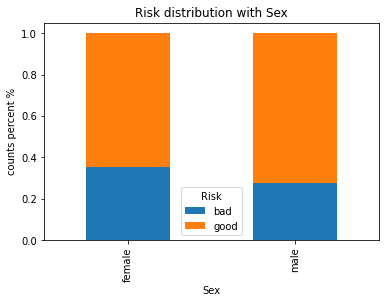

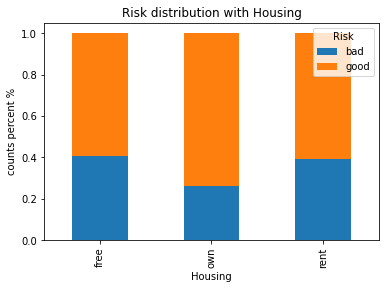

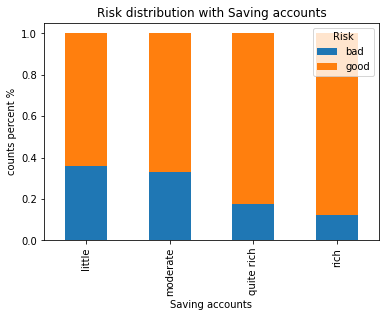

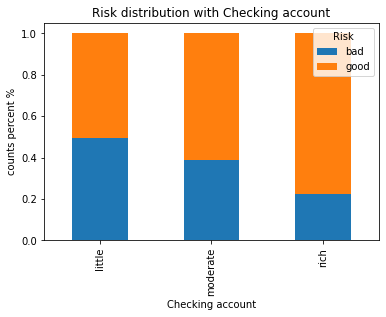

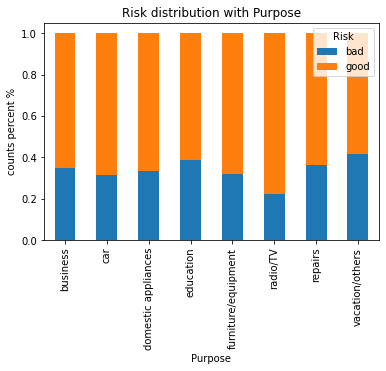

In [79]:
plotRiskObjColumnDistribution(df, 2)

# **4. Data Preprocessing** <a id="preprocessing"></a> <br>
We need to produce a new dataset (df_credit) for prediction model construction
1. We need to convert the target varaible **Risk** into a numerical.
2. We need to split df_credit into predict varible and dependent varaible.
2. we do some individual varaible **transforamtion**, **fill missing data**  

## 4.1 prepare for target variable **Risk**

In [45]:
#Importing the data
df = pd.read_csv("german_credit_data.csv", index_col=0)
# It is a good idea and coomon practice you do data manpulation on a new dataframe and keep the origianl untouched
df_credit = df

In [46]:
#Change Risk column (target variable) into numerical with 0 and 1 values
df_y = df[['Risk']]
df_y['Risk'] = np.where(df_y.loc[ : , 'Risk']=='good', 0, 1)
df_y.head()
df_y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Risk    1000 non-null   int32
dtypes: int32(1)
memory usage: 11.7 KB


## 4.2 Prepare for predictor variable 

In [47]:
df_credit = df_credit.drop(["Risk"], axis=1)
df_credit.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,NaN,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,NaN,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car


## 4.3 Deal with missing values

count        817
unique         4
top       little
freq         603
Name: Saving accounts, dtype: object


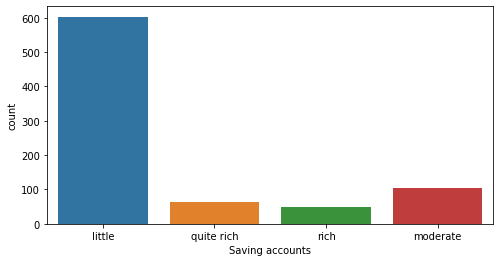

In [49]:
# Saving accounts has 183 missing values and Checking account 394 misisng values 
# check Saving accounts
print(df_credit['Saving accounts'].describe())

plt.figure(figsize=(8,4))
sns.countplot(x='Saving accounts',data = df_credit)

plt.show()

#### From above descritipn and plot, we can see that the value of the **saving account** distribution and **Risk** distribution over the saving account:
1. majority is little, (603/817), the easist solusion is aasign all the missing value as "little"
2. The best solusion is using current distribution to assing randomly generated value ot keep the distribution un changed.

In [50]:
# Assign missing vlaue with little

df_credit['Saving accounts'].fillna('little', inplace = True)
df_credit['Saving accounts'].describe()


count       1000
unique         4
top       little
freq         786
Name: Saving accounts, dtype: object

count        606
unique         3
top       little
freq         274
Name: Checking account, dtype: object


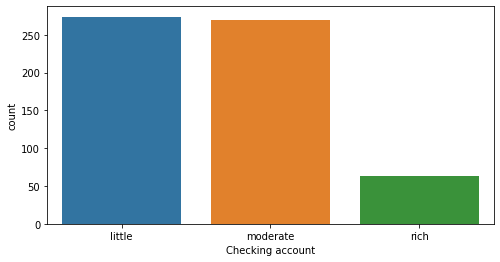

In [51]:
# Saving accounts has 183 missing values and Checking account 194 misisng values 
# check Saving accounts
print(df_credit['Checking account'].describe())

plt.figure(figsize=(8,4))
sns.countplot(x='Checking account',data=df_credit)

plt.show()

**Findings**: 
1. We can see that the current distribution is pretty even between **Little** and **Moderate**; and only small amount has value of **rich**
2. The targeted dependent varaible **Risk** for the three category distribution are vary a lot. 

**Suggestion:** among the many fill misiing value methods, one of them may suitable for this situation. **that is create a new catergory value** like *NoInfo* it self is valualbe since the number of missing value is almost the same quntity with any other two most couurences. 274 for littel and 194 missing values. 

<AxesSubplot:xlabel='Checking account', ylabel='count'>

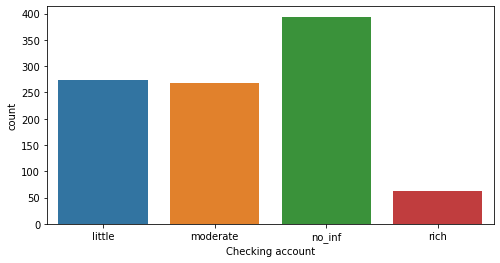

In [53]:
# fill the missing value with a category called "No_info"
df_credit['Checking account'].fillna('no_inf', inplace=True)
df_credit['Checking account'].head()
#df_credit['Checking account'].describe()
plt.figure(figsize=(8, 4))
sns.countplot(x='Checking account',data=df_credit)

## 4.4 Deal with skewed varaibles

The numerical varaibles are all skewed to the left. They will affact most of ML models.
We need to normalise them by performming a **log transformation** before using these features in our modelling.

=== Distribution of features with number values ===
['Age', 'Job', 'Credit amount', 'Duration']


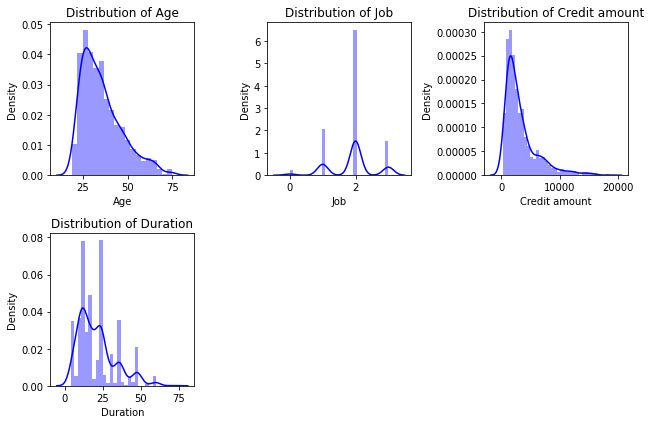

In [54]:
plotNumColumnDistribution(df, 3)

In [55]:
# Log transform function
def log_transform(data, to_log):
    X = data.copy()
    for item in to_log:
        # Add 1 to the data to prevent infinity values
        X[item] = np.log(1+X[item])
    return X

In [56]:
# log transfer
df_credit = log_transform(df_credit, ['Age', 'Credit amount', 'Duration'])

=== Distribution of features with number values ===
['Age', 'Job', 'Credit amount', 'Duration']


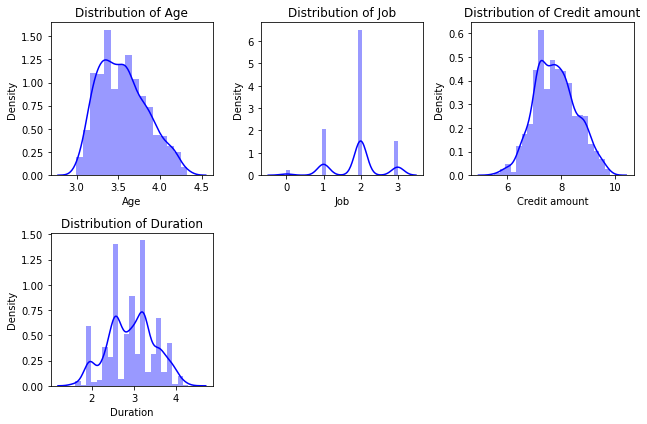

In [57]:
# check the result
plotNumColumnDistribution(df_credit, 3)

## 4.5 Transform category variables into numberical

We need to do this for 2 reasons:
1. most of the prediction models need predictor to be numberical
2. for correclation analysis we need attributres ot be numberical.

In [58]:
def one_hot_encoder(df, nan_as_category = False):
    original_columns = list(df.columns)
    categorical_columns = [col for col in df.columns if df[col].dtype == 'object']
    df = pd.get_dummies(df, columns = categorical_columns, dummy_na = nan_as_category)
    new_columns = [c for c in df.columns if c not in original_columns]
    return df

In [59]:
# do transformation on df-credit
df_credit_T = one_hot_encoder(df_credit)
print(df_credit_T.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          1000 non-null   float64
 1   Job                          1000 non-null   int64  
 2   Credit amount                1000 non-null   float64
 3   Duration                     1000 non-null   float64
 4   Sex_female                   1000 non-null   uint8  
 5   Sex_male                     1000 non-null   uint8  
 6   Housing_free                 1000 non-null   uint8  
 7   Housing_own                  1000 non-null   uint8  
 8   Housing_rent                 1000 non-null   uint8  
 9   Saving accounts_little       1000 non-null   uint8  
 10  Saving accounts_moderate     1000 non-null   uint8  
 11  Saving accounts_quite rich   1000 non-null   uint8  
 12  Saving accounts_rich         1000 non-null   uint8  
 13  Checking account_li

After all the df_credit change into **numerical** we can see the realtion between therm with the target variable **Risk**. We need to concat them together to form a training dataset.

In [60]:
#concat the df_credit with df_y 
data_train = pd.concat([df_credit_T, df_y], axis=1)
data_train.head()


,Age,Job,Credit amount,Duration,Sex_female,Sex_male,Housing_free,Housing_own,Housing_rent,Saving accounts_little,...,Checking account_rich,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others,Risk
0,4.219508,2,7.064759,1.945910,0,1,0,1,0,1,...,0,0,0,0,0,0,1,0,0,0
1,3.135494,2,8.691483,3.891820,1,0,0,1,0,1,...,0,0,0,0,0,0,1,0,0,1
2,3.912023,1,7.648263,2.564949,0,1,0,1,0,1,...,0,0,0,0,1,0,0,0,0,0
3,3.828641,2,8.972464,3.761200,0,1,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,3.988984,2,8.491055,3.218876,0,1,1,0,0,1,...,0,0,1,0,0,0,0,0,0,1


=== Distribution of features with number values ===
['Age', 'Job', 'Credit amount', 'Duration', 'Sex_female', 'Sex_male', 'Housing_free', 'Housing_own', 'Housing_rent', 'Saving accounts_little', 'Saving accounts_moderate', 'Saving accounts_quite rich', 'Saving accounts_rich', 'Checking account_little', 'Checking account_moderate', 'Checking account_no_inf', 'Checking account_rich', 'Purpose_business', 'Purpose_car', 'Purpose_domestic appliances', 'Purpose_education', 'Purpose_furniture/equipment', 'Purpose_radio/TV', 'Purpose_repairs', 'Purpose_vacation/others', 'Risk']


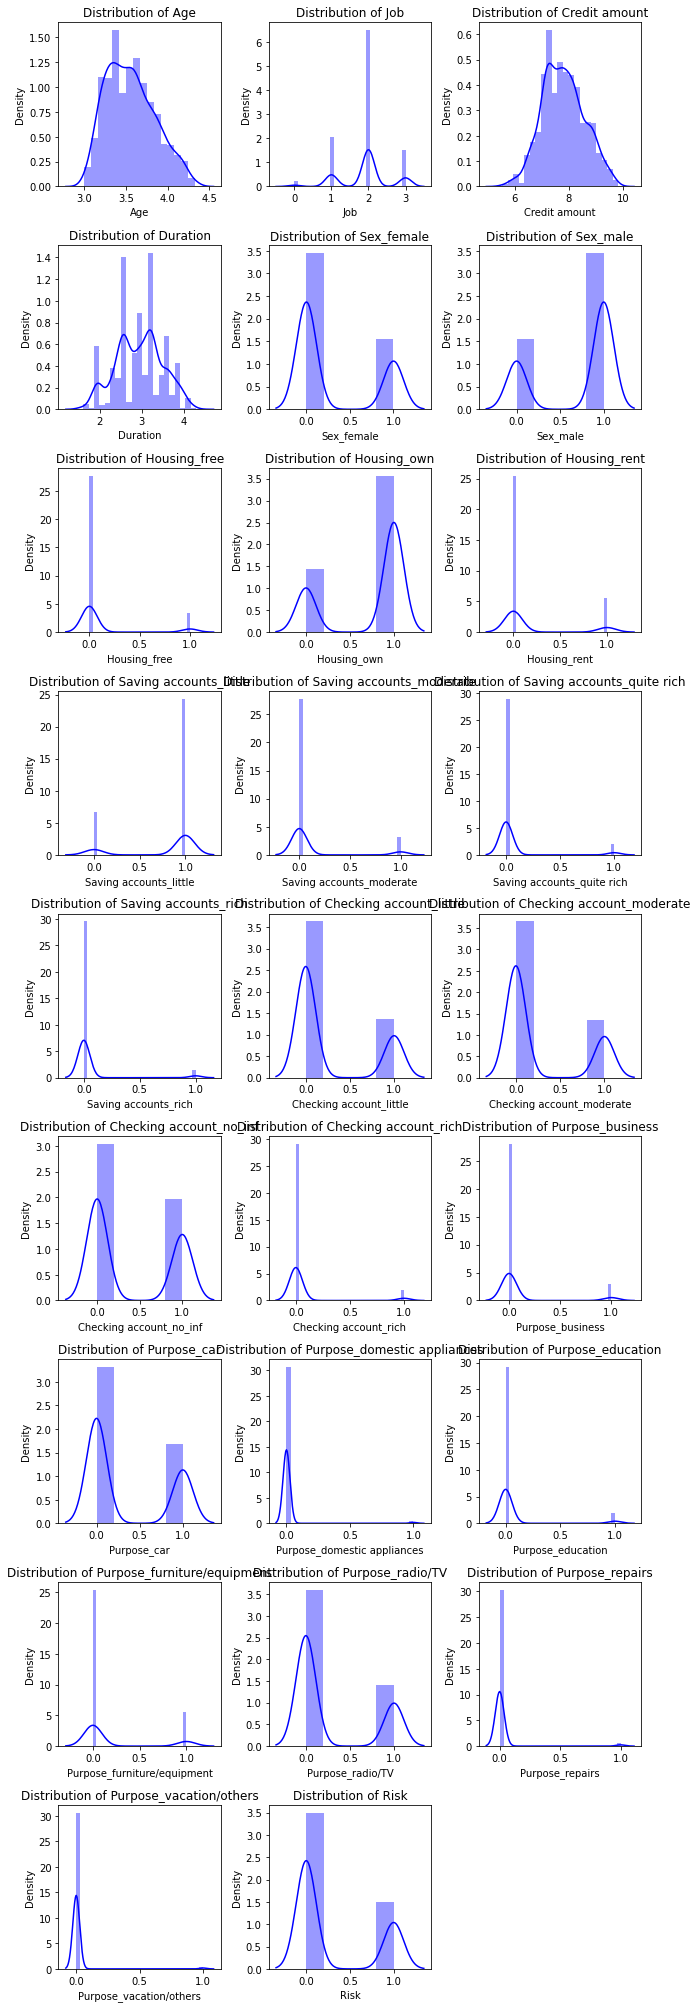

In [61]:
# check distributions
plotNumColumnDistribution(data_train, 3)

After this basic data preprocessing, we have produced a new data set ready for to be used ofr our model constrcution. 
1. df_credit_T: Dataset only comtains independent varaibles after normalisation
2. df_y: dataset only has the dependent varaible "Risk" and only has 0 and 1 
3. data_train: concation of the two

We are ready to build our prediction models. We also need to assess our models performance. That is the nest action.

# **5. Prediction Model Construction and Evaluation** <a id="Modelling"></a> <br>

Python has a rich liberary for Machine Learning. The most used liberary is **Sklearn**. In sklearn, all machine learning models are implemented as Python classes. so it very simple to use. 

We will load these classes and user our Preprocessed data to instanciate these class and have abasic assessment on the performance of the models.

We know that a good prrediction model can not be build in one go, the precess is gernally involves a iterative process. It measn we may need comeback to data process (like feature selection or data tranformation) to improve data quality for the models.

For the initial impression of the poosible prediction models, we use all the popular and offered by the Python **Sklearn** models:
- Random Forest Classifier
- Logistic Regression models
- Decision Tree Classifier
- K-Nearest Neighbors Classifier
- Random Forest Classifier
- Gaussian Naive Bayes 
- SVC
- XGBClassifier
**Use all the defaut parameters without any specification**

In [102]:
#pip install xgboost --user

In [60]:
# liberary loading
from sklearn.model_selection import train_test_split, KFold, cross_val_score # to split the data
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, fbeta_score #To evaluate our model

from sklearn.model_selection import GridSearchCV

# Algorithmns models to be compared
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [61]:
X = df_credit_T
y = df_y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Modle LR has: 0.720 accuracy
Modle KNN has: 0.712 accuracy
Modle DT has: 0.672 accuracy
Modle NB has: 0.652 accuracy
Modle RF has: 0.752 accuracy
Modle SVM has: 0.716 accuracy
[16:28:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Modle XGB has: 0.744 accuracy


<Figure size 792x432 with 0 Axes>

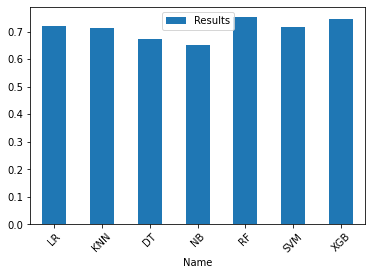

In [92]:
# to feed the random state
seed = 42

# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('XGB', XGBClassifier()))

# evaluate each model in turn
results = []
names = []

for name, model in models:
        model.fit(X_train, y_train)
        pre_results = model.predict(X_test)
        model_acc = accuracy_score(y_test, pre_results)
        names.append(name)
        results.append(model_acc)
        msg = "Modle %s has: %0.3f accuracy" % (name, model_acc)
        print(msg)      

#print(names)
#print(results) 
# boxplot algorithm comparison
results_df = pd.DataFrame({'Name':names, 'Results':results})
#print(results_df)
fig = plt.figure(figsize=(11,6))
fig.suptitle('Algorithm Comparison')

results_df.plot.bar(x='Name',rot=45)

plt.show()

We can see how easy the model can be constructed and how the results can be predicted.
However, we dont knwo the results are best or not. This can be conformed or improved after the modles fine tune.

**Findings:**
- all models have moderate accuracy. (65-75%)
- some models perform a liitle better than others. 
- Random Forest has **74.4%** accuracy

# **6. Prediciton Model fine tune**<a id="tune"></a> <br>

To improve model’s prediction is generally focused on two aspects: 

**1. Increase the samples' quality;**

The samples used in the model training has bid affact on the model's performance. To use proper numbers of property and the appropriate property can increase the model's accuracy and increase the training cost. the most 2 popular methods used for property selection are:
**Coorelation analysis** and the **K-fold cross validation**.

**2. Adjust models' parameters;**

Each predictin model is defined or represented by the model parameters. However, the process of training a model involves choosing the optimal **hyperparameters** that the learning algorithm will use to learn the optimal parameters that correctly map the input features (independent variables) to the labels or targets (dependent variable). Hyperparameters are different depends on the prediciton models. There are different methods can be used to fine tune thses hyperparameters also depends on the model used.

Some usful techniques to explore:

1. K-fold cross validation
There are many methods to increse sample numbers. Such as Upsampling, it can overcome imbalance class. However, up-sampling can cause overfitting. Thus, k-fold cross validation will be used because this method is more superior than the simple train/test split to prevent overfitting. In addition, K=5 is chosen because empirical data showed that this value produces lower error rate and has a balanced bias vs variance (An Introduction to Statistical Learning, 2017).
2. Stratification
Due to class imbalance, for k-fold cross validation, we might end up with folds which has no representation from the minority class (Jason Brownlee, 2020). Hence, stratification will be applied to ensure that the original class distribution is maintained in each fold.
3. SMOTE method
If upsampling is done before cross validation, we risk data leak traps since the same upsampled data might appear in both the training and validation folds. Hence, SMOTE method will be used to segregate the data into its respective folds before up-sampling is done in each fold. SMOTE is selected because of its low chances of overfitting and information loss. (Nitesh, 2002)
4. Log transformation and Data scaling
Features in our dataset are skewed and have high variance. Such high variance will negatively impact the accuracy of the model. Thus, log transformation is done to reduce features’ variance. For features with minimum value of zero, 1 is added before taking log to prevent infinity values. Thereafter, Z-score normalization is done so that features are compared on a similar scale.
5. Hyper-parameter tunning
Hyper-parameters must be tuned to overcome bias-variance trade off in the models.
For example, in Random Forest, when the number of trees is low at the extreme left, underfitting results in high bias, thus high errors. As number of trees is increased towards the right side of the graph, overfitting sets in, resulting in low training error but increasing validation error. Thus, hyper-parameters must be fine-tuned to select the best param which prevent overfitting and underfitting. The hyper-parameters will be fine-tunned using GridSearchCV.

## **6.1 Features selection** <a id="Correlation"></a> <br>

For any prediction models, features selection is important. It affacts the model's performance by 1. the number of the properties used (not the more the better). 2. whoch property to use (not use the ones are correlated). The two general methods used are:
- Correlation analysis
- PCA analysis

### 6.1.1 Correlation Analysis

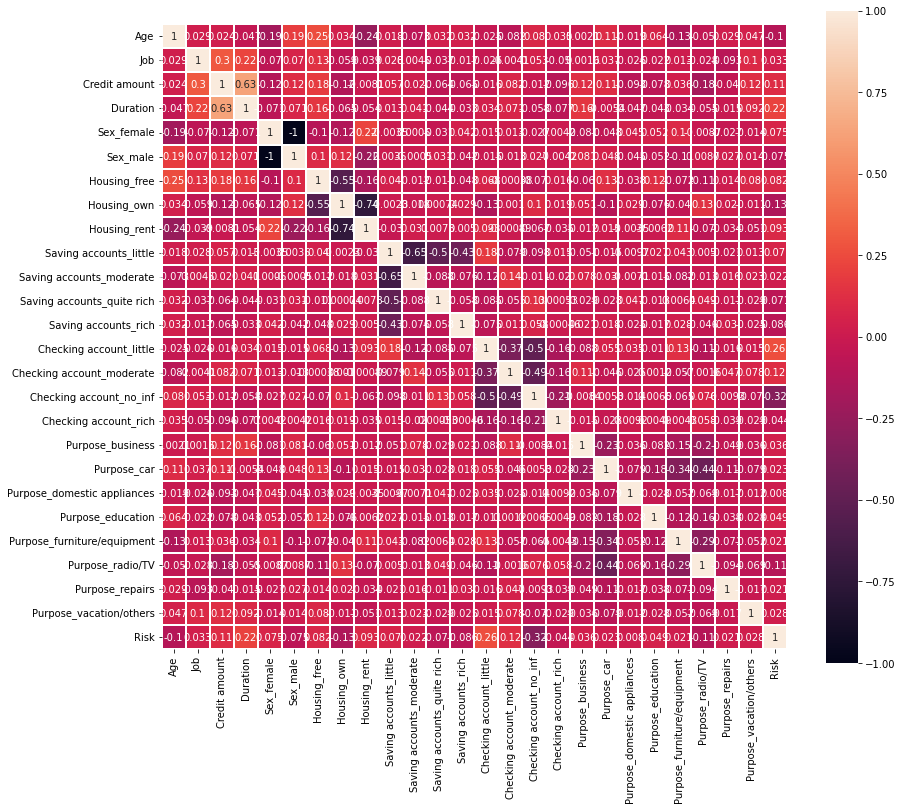

In [67]:
# Correlation analysis of on the data_train rather than df_credit_T
# Because we want see the correlation with Risk 
plt.figure(figsize=(14,12))
sns.heatmap(data_train.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True,  linecolor='white', annot=True)
plt.show()

Above correlation heatmap shows **the correlations among the variables**. 
Apart from the correlations between varibles, Our attention should focuse on the correlation between the predictor varibles and also shows the coorelations between predictors and the target variable **Risk**.

**Findings:**
1. The most positive correlation with **Risk** are: **Checking account_little, Duration, saving account little, house_rent and Credit_amount**. 
2. **Checking account_no_info** has a negitive on the **Risk**.
3. Correlation analysis provides basic inforamtion on the coonections between predictors and the target varaible.

### The importance of the independent (predictors) variable with target variable in order

In [100]:
# show the most influenced variables
var_importance = data_train.corrwith(data_train["Risk"]).abs()
var_importance.sort_values(ascending=False)

Risk                           1.000000
Checking account_no_inf        0.322436
Checking account_little        0.258333
Duration                       0.215280
Housing_own                    0.134589
Checking account_moderate      0.119581
Credit amount                  0.109588
Purpose_radio/TV               0.106922
Age                            0.102463
Housing_rent                   0.092785
Saving accounts_rich           0.085749
Housing_free                   0.081556
Sex_male                       0.075493
Sex_female                     0.075493
Saving accounts_quite rich     0.070954
Saving accounts_little         0.070234
Purpose_education              0.049085
Checking account_rich          0.044009
Purpose_business               0.036129
Job                            0.032735
Purpose_vacation/others        0.028058
Purpose_car                    0.022621
Saving accounts_moderate       0.022255
Purpose_furniture/equipment    0.020971
Purpose_repairs                0.020828


**Findings:**

With this order we can decide hwo many and which parameters to use.

### 6.1.2 PCA Analysis 

With PCA, we can also find **the number of features required** to explain the variance in all candidate features. We have 25 features that all can potentially be predictors. Let us see their prediction power over target varaible.

In [68]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
n=25
columns=['PCA_1', 'PCA_2', 'PCA_3', 'PCA_4', 'PCA_5', 'PCA_6', 'PCA_7', 
         'PCA_8', 'PCA_9', 'PCA_10', 'PCA_11', 'PCA_12','PCA_13','PCA_14',
         'PCA_15', 'PCA_16', 'PCA_17', 'PCA_18', 'PCA_19', 'PCA_20', 'PCA_21', 
         'PCA_22', 'PCA_23', 'PCA_24', 'PCA_25'
        ]

PCA is effected by scale. So we need to scale the features in our data before applying PCA. The cale ois done by using **StandardScaler**. It can standarlize the dataset’s features onto unit scale (mean = 0 and variance = 1) which is a requirement for the optimal performance of many machine learning algorithms. 


In [69]:
# Standardizing the features
# df_credit_T is the origianl dataset applied 
X = StandardScaler().fit_transform(df_credit_T)


### Using PCA **.fit_transform()** to find PCs

In [70]:
# Create the PCA instance and fit and transform the data with pca
pca = PCA(n_components=n)
pc = pca.fit_transform(X)
df_pc = pd.DataFrame(pc, columns=columns)
df_pc.head()

,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8,PCA_9,PCA_10,...,PCA_16,PCA_17,PCA_18,PCA_19,PCA_20,PCA_21,PCA_22,PCA_23,PCA_24,PCA_25
0,-0.600711,-1.278510,-2.366800,0.741020,-1.218156,-0.144496,-0.557211,0.373424,1.023033,-0.409206,...,0.536494,-1.240949,-1.084859,1.434267,0.618480,-1.878603e-15,2.378522e-15,2.151867e-15,1.022244e-15,5.978439e-18
1,1.039185,0.401693,0.447350,-3.259128,0.887142,-1.365429,-0.413454,-0.413842,1.065483,-0.099424,...,-0.892951,0.336264,0.605081,-0.235964,-0.003262,5.381710e-15,-2.159409e-17,-6.644821e-16,1.576761e-15,-2.104879e-17
2,-0.719277,-1.304296,-1.229190,1.247007,0.258864,-1.267335,-0.415921,1.373027,-2.335661,-0.925452,...,-0.183524,1.534062,1.042763,1.064686,0.400208,-6.584574e-16,-2.910985e-16,8.957008e-16,-5.231741e-16,-4.986260e-17
3,-1.471888,3.497006,-0.715704,0.524794,-0.058882,1.139820,-0.754233,2.234971,0.386154,0.138861,...,-0.552599,-1.620929,1.067809,-0.262236,0.013491,-1.758818e-15,-1.408419e-16,2.232021e-16,-3.249271e-16,-7.034323e-19
4,-1.871967,3.078152,-0.709569,2.127638,-0.637485,-0.643114,0.301065,0.431371,0.768894,-0.140053,...,-0.103138,-1.132354,0.341589,-0.346131,0.226346,3.026493e-15,-2.942822e-15,2.368579e-15,-1.211797e-15,6.744172e-16


The DataFrame **df_pc** shows the **explained variance**, which is the information (variance) attributed by each of the principal components. This important that we know how much information contribution can be accumulated by a number of the pricinple components together. PCA.explained_variance_ratio_ tell us the percentage (importantce) of each PC. Notice that **this analysis does not link predictors witht he target variable**. 

In [71]:
pca.explained_variance_ratio_

array([9.97973265e-02, 9.26018895e-02, 7.98091938e-02, 6.84952199e-02,
       6.12068957e-02, 5.61772064e-02, 5.48306165e-02, 4.97029669e-02,
       4.78034574e-02, 4.40624541e-02, 4.35753445e-02, 4.14294789e-02,
       4.08266148e-02, 3.93405672e-02, 3.86724483e-02, 3.67979494e-02,
       3.44938726e-02, 3.04768911e-02, 2.65751092e-02, 1.33244973e-02,
       8.40219897e-33, 6.29381465e-33, 4.93728674e-33, 3.63915126e-33,
       2.45191959e-35])

**Finding:**
**explained_variance_ratio_**, tells us that the first principal component contains 9.98% of the variance and the second principal component contains 9.26% of the variance. Together, the two components contain nearly 20% of the information.

### Plot the (variance) of PCA information contribution in a Bar chat

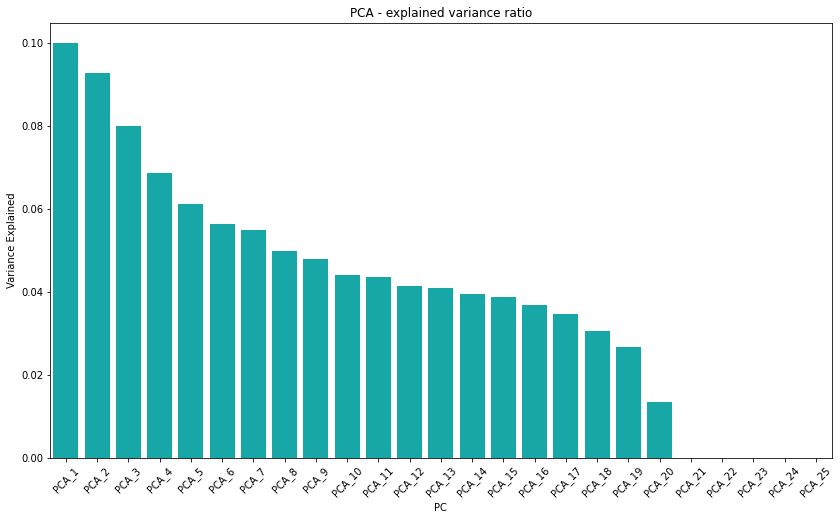

In [73]:
# Create a DataFrame for visulisation
pca_df = pd.DataFrame({'Variance Explained':pca.explained_variance_ratio_,
             'PC':df_pc.columns})

plt.figure(figsize=(14, 8))
plt.title('PCA - explained variance ratio')
# Plot DataFrame
sns.barplot(x='PC',y='Variance Explained', 
           data=pca_df, color="c")
plt.xticks(rotation=45)
plt.show()

### Plot the cumulated (variance) information contribution

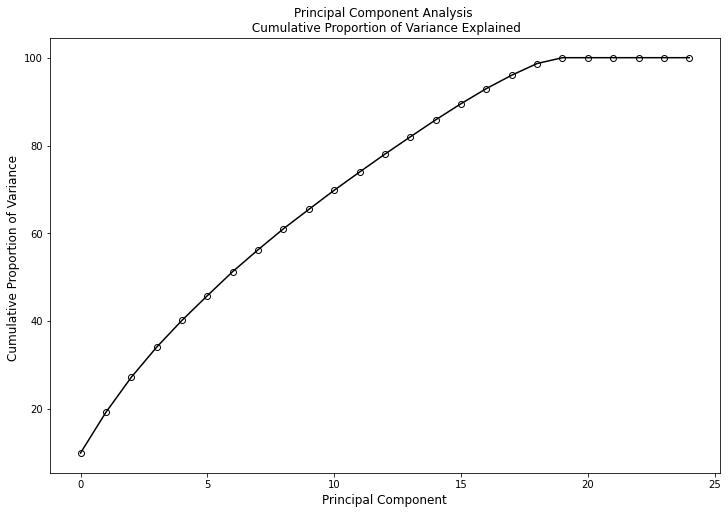

In [74]:
plt.figure(figsize=(12, 8))
# Instantiate, fit and transform

var = pca.explained_variance_ratio_

# Plot cumulative variance
cumulative_var = np.cumsum(var)*100
plt.plot(cumulative_var,'k-o',markerfacecolor='None',markeredgecolor='k')
plt.title('Principal Component Analysis \n Cumulative Proportion of Variance Explained',fontsize=12)
plt.xlabel("Principal Component",fontsize=12)
plt.ylabel("Cumulative Proportion of Variance ",fontsize=12)
plt.show()

 **Finding:**
From the plots above, we see that approximately **17 features** are needed to explain 90% of the variance in the dataset.
This gives us a good intuition of the number of features required in our model.

**For the minimun numbers of predicctor to achieve the best performance, the number of predictors are 20. With coorelation analysis, we can choice the 20 predictors.**

## Assess models' performance after features selection

In [75]:
# Data preparation
X = df_credit_T.drop(['Purpose_car', 'Saving accounts_moderate', 'Purpose_furniture/equipment', 'Purpose_repairs', 'Purpose_domestic appliances'], axis=1)
y = df_y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Modle LR has: 0.720 accuracy
Modle KNN has: 0.712 accuracy
Modle DT has: 0.656 accuracy
Modle NB has: 0.652 accuracy
Modle RF has: 0.776 accuracy
Modle SVM has: 0.716 accuracy
[14:31:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Modle XGB has: 0.744 accuracy


<Figure size 792x432 with 0 Axes>

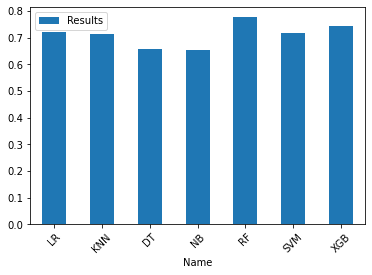

In [63]:
# to feed the random state
seed = 42

# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('XGB', XGBClassifier()))

# evaluate each model in turn
results = []
names = []

for name, model in models:
        model.fit(X_train, y_train)
        pre_results = model.predict(X_test)
        model_acc = accuracy_score(y_test, pre_results)
        names.append(name)
        results.append(model_acc)
        msg = "Modle %s has: %0.3f accuracy" % (name, model_acc)
        print(msg)      

#print(names)
#print(results) 
# boxplot algorithm comparison
results_df = pd.DataFrame({'Name':names, 'Results':results})
#print(results_df)
fig = plt.figure(figsize=(11,6))
fig.suptitle('Algorithm Comparison')

results_df.plot.bar(x='Name',rot=45)

plt.show()

**Findings:**

- We can see after select predictors the noice has been reduced, so all models' performace has been improved.
- **Note the accuracy of Random Forest increase from 74.4% to 74.8% accuracy**

## **6.2 Access model's Overfitting with CV**

[Cross Validation](https://scikit-learn.org/stable/modules/cross_validation.html) is an important mehtods in Machine Leanring and model construction. In k-fold CV, the training set is split into k smaller sets. The following procedure is followed for each of the k “folds”:

A model is trained (constructed) using of the folds as training data;

The model is then validated on the remaining part of the data (i.e., it is used as a testset to compute a performance measure such as accuracy).

The performance measure reported by k-fold cross-validation is then the average of the values computed in the loop. 

This approach can be computationally expensive, but does not waste too much data (as is the case when fixing an arbitrary validation set), which is a major advantage where the number of samples is very small.

<img src="grid_search_cross_validation.png" width="500" >


In [79]:
# Data preparation
X = df_credit_T.drop(['Purpose_car', 'Saving accounts_moderate', 'Purpose_furniture/equipment', 'Purpose_repairs', 'Purpose_domestic appliances'], axis=1)
y = df_y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

LR accurcy= 0.732  and sd = 0.040)
KNN accurcy= 0.706  and sd = 0.037)
DT accurcy= 0.632  and sd = 0.043)
NB accurcy= 0.668  and sd = 0.059)
RF accurcy= 0.709  and sd = 0.051)
SVM accurcy= 0.703  and sd = 0.041)


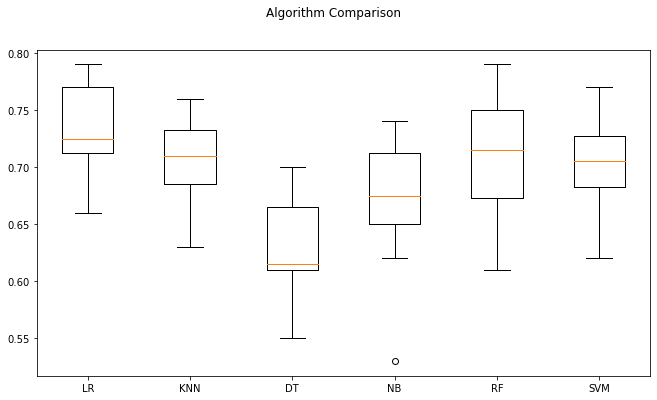

In [72]:
# to feed the random state
seed = 42

# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('SVM', SVC(gamma='auto')))
#models.append(('XGB', XGBClassifier()))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'

for name, model in models:
        
        kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
        #cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
        cv_results = cross_val_score(model, X, y, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s accurcy= %0.3f  and sd = %0.3f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
        
# boxplot algorithm comparison
fig = plt.figure(figsize=(11,6))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

**Finding:**

- **Not** all models' performance has been improved with K=10 fold CV. Why?
- A good explainition on K-fold CV is in https://scikit-learn.org/stable/modules/cross_validation.html


K-fold CV is useful to iliminate **overfitting**.

This can be confirmed by using **cross_validate**, which we can export the taining and the testing accuracy. The training accuracy is the mean accuracy on the X_train and y_train, and the test accuracy is the accuracy on X_test and y_test. That is the accuracy we used in the previouse evaluation. 

Modle LR has: 0.745 train accuracy, 0.732 test accuracy
Modle KNN has: 0.805 train accuracy, 0.706 test accuracy
Modle DT has: 1.000 train accuracy, 0.637 test accuracy
Modle NB has: 0.699 train accuracy, 0.668 test accuracy
Modle RF has: 1.000 train accuracy, 0.730 test accuracy
Modle SVM has: 0.726 train accuracy, 0.703 test accuracy


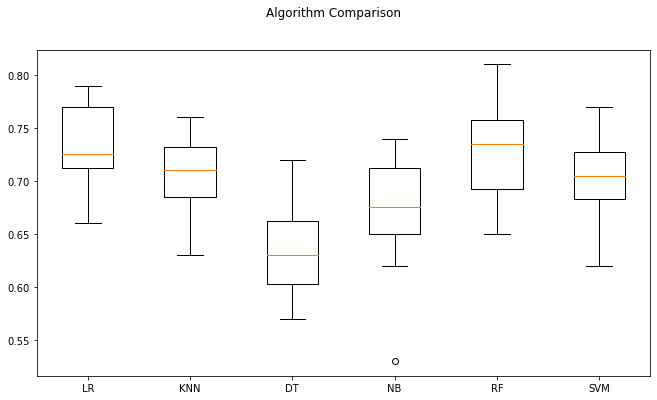

In [71]:
from sklearn.model_selection import cross_validate
# to feed the random state
seed = 42

# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('SVM', SVC(gamma='auto')))
#models.append(('XGB', XGBClassifier()))

# evaluate each model in turn
results = []
validates = []
names = []
scoring = 'accuracy'

for name, model in models:
        
        kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
        #cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
        cv_results = cross_validate(model, X, y, cv=kfold, scoring=scoring, return_train_score=True)
        #print(CV_results.keys())
        model_acc = cv_results['train_score']
        model_val = cv_results['test_score']
        validates.append(model_val) 
        names.append(name)
        results.append(model_acc)
        #print(CV_results.keys())
        #print(model_acc)
        msg = "Modle %s has: %0.3f train accuracy, %0.3f test accuracy" % (name, model_acc.mean(), model_val.mean())
        #msg = "Modle %s has: %0.3f test accuracy" % (name,  model_val.mean())
        print(msg)             
        
# boxplot algorithm comparison
fig = plt.figure(figsize=(11,6))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(validates)
ax.set_xticklabels(names)
plt.show()

**Finding:**
We can see that all models has a sligh higher accuracy on the training and a lower accuracy on test. It shows all our models has **"overfitting"**

## **6.3 Models' Hyperparameter setting** <a id="parameter"></a> <br>

All models used so far take defaut parameters. It is a common practice that fine tune hyperparameters for models used in the final prediction. In this tutorial we use **Random Forest** model as an example to demonstrate the process and technologies used for model fine tune. 


With scikit-learn, tuning a classifier for recall can be achieved in (at least) two main steps.

1. Using GridSearchCV to tune your model by searching for the best hyperparameters and keeping the classifier with the highest recall score.
2. Adjust the decision threshold using the precision-recall curve and the roc curve, which is a more involved method that I will walk through.

Random Forest Hyperparameters we’ll be Looking at:
- **max_depth:** 
The max_depth of a tree in Random Forest is defined as the longest path between the root node and the leaf node
- **min_sample_split:** default is 2. This means that if any terminal node has more than two observations and is not a pure node, we can split it further into subnodes.
- **max_leaf_nodes:** sets a condition on the splitting of the nodes in the tree and hence restricts the growth of the tree. If
- **min_samples_leaf:** specifies the minimum number of samples that should be present in the leaf node after splitting a node.
- **n_estimators:** how many trees should we consider
- **max_sample (bootstrap sample):** determines what fraction of the original dataset is given to any individual tree. 
- **max_features:** the number of maximum features provided to each tree in a random forest.
- **criterion:** the measures of splitting of a node of a decision tree (jini, entropy and error rate).

Among theses Hyperparameters, three catigories are covered: Tree size (terminate conditions), sample and features. So the gris is also normally specifying these three.

#### Basic Techniques:

- [RandomizedSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)
- [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

In [109]:
#Seting the Hyper Parameters
param_grid = {"max_depth": [3, 5, 7, 10, None],
              "n_estimators":[10, 15, 50, 100],
              "max_features": [2,3,4,5,10, 15, 20]}

#Creating the classifier
model = RandomForestClassifier(random_state = 42)

grid_search = GridSearchCV(model, param_grid = param_grid, cv=5, scoring='accuracy', verbose=0)
# we use recall rather than accurate because in our applicaiton we care more of correct prediciton rate on positive results.
# verbose shows the msg to display:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [3, 5, 7, 10, None],
                         'max_features': [2, 3, 4, 5, 10, 15, 20],
                         'n_estimators': [10, 15, 50, 100]},
             scoring='accuracy')

**Notice:**
CV=5, Scoring is Recall. 

In [110]:
print(grid_search.best_score_)
print(grid_search.best_params_)

0.7386666666666667
{'max_depth': 7, 'max_features': 4, 'n_estimators': 100}


In [114]:
#rf = RandomForestClassifier(max_depth=4, max_features=4, n_estimators=100, random_state=42)
rf = RandomForestClassifier(max_depth=None, max_features=20, n_estimators=15, random_state=42)
#rf = RandomForestClassifier(max_depth=None, max_features=15, n_estimators=15, random_state=42)
#rf = RandomForestClassifier(max_depth=None, max_features=15, n_estimators=25, random_state=42)
#rf = RandomForestClassifier(max_depth=None, max_features=15, n_estimators=500, random_state=42)
rf = RandomForestClassifier(max_depth=3, max_features=15, n_estimators=100, random_state=42)
#rf = RandomForestClassifier(random_state=42)
#trainning with the best params
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, max_features=15, random_state=42)

In [116]:
#Testing the model 
#Predicting using our  model
y_pred = rf.predict(X_test)

# Verificaar os resultados obtidos
print(accuracy_score(y_test, y_pred))
print("\n")
print(confusion_matrix(y_test, y_pred))

0.748


[[171   7]
 [ 56  16]]


#### **Finding:**
with Grid search we can find the best hyperparameters.
Use them we can improve the model's performance.

Note the accuracy of Random Forest increase from 74.4% to 74.8% and now  **76%**

# End